In [2]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential 
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

#resize all the images to this

In [3]:
image_size = [224,224]

In [4]:
train_path = '/Users/juggs/Desktop/Python/projects/Chest X-ray/chest_xray dataset/train'
test_path = '/Users/juggs/Desktop/Python/projects/Chest X-ray/chest_xray dataset/test'

#add preprocessing layer to the front of VGG

In [5]:
vgg = VGG16(input_shape = image_size + [3], weights = 'imagenet', include_top = False)

58892288/58889256 [==============================] - 60s 1us/step


Not training existing weights 

In [6]:
for layer in vgg.layers:
    layer.trainable = False

Useful for getting number of classes

In [7]:
folders = glob('/Users/juggs/Desktop/Python/projects/Chest X-ray/chest_xray dataset/train/*')

Layers - we can add more if we want

In [8]:
x = Flatten()(vgg.output)

In [9]:
# x = Dense(1000, activation = 'relu')(x)

In [10]:
prediction = Dense(len(folders), activation = 'softmax')(x)

Model Object

In [11]:
model = Model(inputs = vgg.input, outputs = prediction)

structure of the model

In [12]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

#Compile

In [13]:
model.compile(
  loss = 'categorical_crossentropy',
  optimizer = 'adam',
  metrics = ['accuracy']
)

In [14]:
from keras.preprocessing.image import ImageDataGenerator

In [15]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                  shear_range = 0.2,
                                  zoom_range = 0.2,
                                  horizontal_flip = True)

In [20]:
test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('/Users/juggs/Desktop/Python/projects/Chest X-ray/chest_xray dataset/train',
                                                target_size = (224,224),
                                                batch_size = 32,
                                                class_mode = 'categorical')

test_set = train_datagen.flow_from_directory('/Users/juggs/Desktop/Python/projects/Chest X-ray/chest_xray dataset/test',
                                            target_size = (224,224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


Fit the Model

In [21]:
r = model.fit_generator(
   training_set,
   validation_data = test_set,
   epochs = 5,
   steps_per_epoch = len(training_set),
   validation_steps = len(test_set)
   )

Epoch 1/5
163/163 [==============================] - 2062s 13s/step - loss: 0.2342 - accuracy: 0.9172 - val_loss: 1.4093 - val_accuracy: 0.7660
Epoch 2/5
163/163 [==============================] - 1988s 12s/step - loss: 0.1269 - accuracy: 0.9519 - val_loss: 0.0599 - val_accuracy: 0.8686
Epoch 3/5
163/163 [==============================] - 3241s 20s/step - loss: 0.1004 - accuracy: 0.9607 - val_loss: 1.5224 - val_accuracy: 0.8077
Epoch 4/5
163/163 [==============================] - 2127s 13s/step - loss: 0.0864 - accuracy: 0.9655 - val_loss: 0.7394 - val_accuracy: 0.8686
Epoch 5/5
163/163 [==============================] - 2115s 13s/step - loss: 0.0750 - accuracy: 0.9745 - val_loss: 0.5299 - val_accuracy: 0.8157


Loss

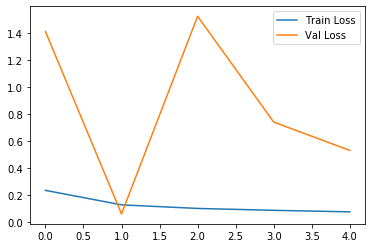

<Figure size 432x288 with 0 Axes>

In [26]:
plt.plot(r.history['loss'], label = 'Train Loss')
plt.plot(r.history['val_loss'], label = 'Val Loss')
plt.legend()
plt.show()
plt.savefig('LossVal_Loss')

Accuries

In [30]:
plt.plot(r.history['acc'], label = 'Train Acc')
plt.plot(r.history['val_acc'], label = 'Val Acc')
plt.legend()
plt.show()
plt.savefig('AccVal_Acc')

KeyError: 'acc'

In [34]:
import tensorflow as tf
from keras.models import load_model

model.save('model_vgg19.h5 ')